In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout, Input, Add, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model

In [2]:
path = Path("/content/drive/MyDrive/archive.zip (Unzipped Files)/utkface_aligned_cropped/UTKFace/") #the image folder path
filenames = list(map(lambda x: x.name, path.glob('*.jpg')))

In [3]:
len(filenames) # size of the file names

23708

In [4]:
filenames[:10]

['85_1_0_20170110181956588.jpg.chip.jpg',
 '88_1_0_20170110183145045.jpg.chip.jpg',
 '92_1_0_20170110183055235.jpg.chip.jpg',
 '81_0_0_20170111222241614.jpg.chip.jpg',
 '73_0_0_20170111211426693.jpg.chip.jpg',
 '63_1_1_20170113190755479.jpg.chip.jpg',
 '72_0_2_20170112205305186.jpg.chip.jpg',
 '83_0_2_20170112223921515.jpg.chip.jpg',
 '6_0_0_20170117201323444.jpg.chip.jpg',
 '8_0_3_20170117133146996.jpg.chip.jpg']

In [5]:
np.random.seed(10) # this means whenever a random seed of 10 is done the same output will be presented
np.random.shuffle(filenames)

age_labels, image_path = [], []   # 2 empty lists created to save with the correspending real value for data preprocess step

for filename in filenames:
    image_path.append(filename)           # what here is actually doing taking the image file name where the image name is as follows ex: age_gender_ethnicty_imageID and appends it to the list
    temp = filename.split('_')            # spliting the filesname by delimeter _
    age_labels.append(temp[0])            # where the age index is the first so it takes it and appends it in the empty list of the age_labels

In [6]:
image_path[:10]

['55_0_3_20170119201758443.jpg.chip.jpg',
 '36_1_1_20170112233326423.jpg.chip.jpg',
 '48_1_2_20170109002813437.jpg.chip.jpg',
 '28_1_2_20170116165557121.jpg.chip.jpg',
 '1_1_3_20161220143335948.jpg.chip.jpg',
 '33_1_3_20170104232231283.jpg.chip.jpg',
 '12_0_0_20170117182308749.jpg.chip.jpg',
 '30_1_4_20170117143606826.jpg.chip.jpg',
 '26_1_4_20170117152504299.jpg.chip.jpg',
 '24_1_2_20170116170642556.jpg.chip.jpg']

In [7]:
df = pd.DataFrame()
df['image'], df['age'] = image_path, age_labels  #images path and age labels is set into a dataframe helps with exploring the data

In [8]:
df.head()

,image,age
0,55_0_3_20170119201758443.jpg.chip.jpg,55
1,36_1_1_20170112233326423.jpg.chip.jpg,36
2,48_1_2_20170109002813437.jpg.chip.jpg,48
3,28_1_2_20170116165557121.jpg.chip.jpg,28
4,1_1_3_20161220143335948.jpg.chip.jpg,1


In [9]:
df = df.astype({'age':'float32'}) # the age is set to a floating point

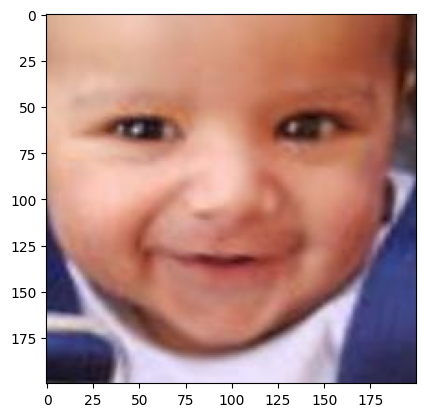

In [10]:
img = Image.open("/content/drive/MyDrive/archive.zip (Unzipped Files)/utkface_aligned_cropped/UTKFace/"+df.image[4]) #using the PIL to plot an image and load it from a specfic index from the dataframe
plt.imshow(img)

<ipython-input-11-a5898436fabd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age) #seaborn libary slects the age from the dataframe to plot in a histogram


<Axes: xlabel='age', ylabel='Density'>

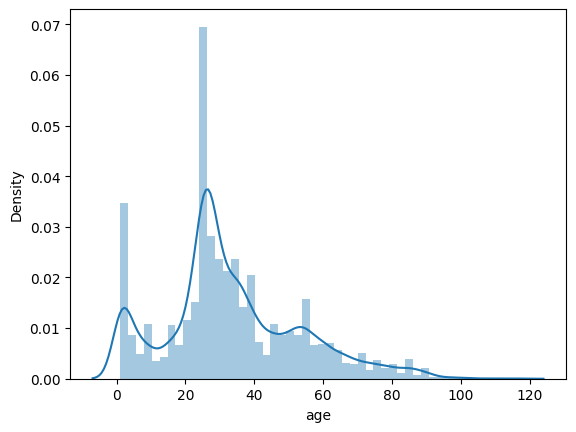

In [11]:
sns.distplot(df.age) #seaborn libary slects the age from the dataframe to plot in a histogram

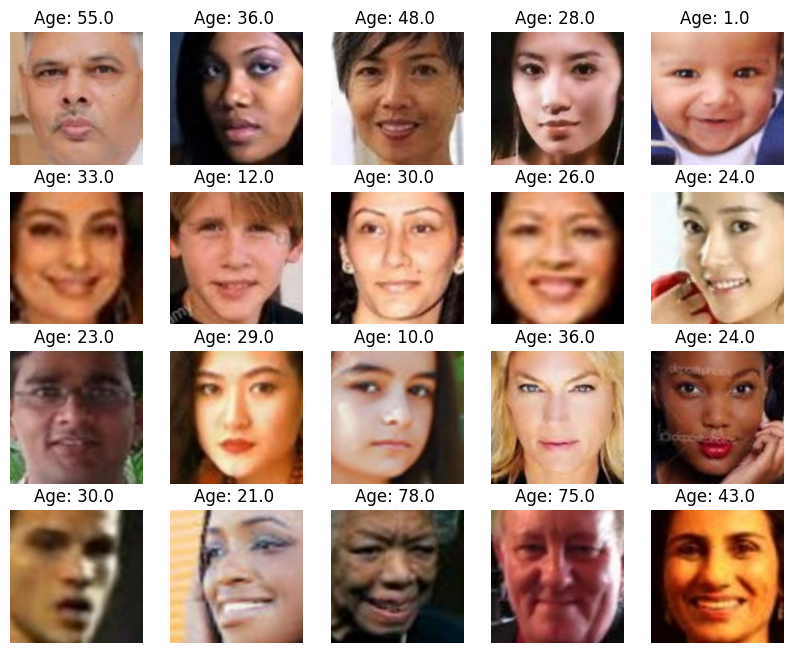

In [13]:
files = df.iloc[0:20] # first 30 rows from the dataframe
plt.figure(figsize=(10,10))
for index, file, age in files.itertuples():  #each row contains the filename of an image with the corresponding age label then its loaded accordingly from the specified directory
    plt.subplot(5,5, index+1)                #and then converted to numpy array
    img = load_img("/content/drive/MyDrive/archive.zip (Unzipped Files)/utkface_aligned_cropped/UTKFace/"+file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} ")
    plt.axis('off')

In [14]:
train, test = train_test_split(df, test_size=0.20, random_state=42) # the split step for the ML train and test samples with the we will split 2 different dataframes test -> for test data train -> for training data
                                                                    # this function splits the df(dataframe to a train and test set) then specifing the test size set into 20% and training is 80% of the whole dataset

In [15]:
train.head() # showing the first 5 rows after spliting the data accordingly of the train set

,image,age
5096,75_0_2_20170112220535400.jpg.chip.jpg,75.0
19586,1_0_3_20161219230002417.jpg.chip.jpg,1.0
9835,34_1_1_20170115235526613.jpg.chip.jpg,34.0
13631,30_1_0_20170117151304315.jpg.chip.jpg,30.0
9807,26_0_1_20170113154700499.jpg.chip.jpg,26.0


In [16]:
test.head() # test set

,image,age
17525,28_0_3_20170119194436435.jpg.chip.jpg,28.0
1147,26_0_0_20170117200055853.jpg.chip.jpg,26.0
1190,18_1_0_20170109212536049.jpg.chip.jpg,18.0
9731,75_1_0_20170110182459565.jpg.chip.jpg,75.0
7387,37_0_3_20170119202410749.jpg.chip.jpg,37.0


In [17]:
train.shape # the shape of the set splited the amount of the train samples we will have and the 2 dataframes we have

(18966, 2)

In [18]:
test.shape # test shape

(4742, 2)

In [24]:
#taking the input values creating an empty list for x_train to store the images then an iteration process for each in image file path column of the training df
# then in the loop each image file is loaded then we can specify a resize process for the image then the images is converted into an array then its appended into the list
x_train = []

for file in train.image:
    img = load_img("/content/drive/MyDrive/archive.zip (Unzipped Files)/utkface_aligned_cropped/UTKFace/" + file)
    img = img.resize((128, 128), Image.ANTIALIAS)
    img = np.array(img)
    x_train.append(img)

x_train = np.array(x_train)                        #This is the list containing numPy arrays representing the resized images from the training set
                                                     #each element of the list is a numPy array is representing an image.

<ipython-input-24-6838ccb5bdc9>:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128, 128), Image.ANTIALIAS)
<ipython-input-24-6838ccb5bdc9>:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128, 128), Image.ANTIALIAS)
<ipython-input-24-6838ccb5bdc9>:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128, 128), Image.ANTIALIAS)
<ipython-input-24-6838ccb5bdc9>:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128, 128), Image.ANTIALIAS)
<ipython-input-24-6838ccb5bdc9>:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LA

In [25]:
x_train = x_train.reshape(len(x_train), 128, 128, 3) #this will be the output layer of NN layer

In [26]:
x_train.shape # showing the shape of the training after the preprocess step

(18966, 128, 128, 3)

In [27]:
x_train = x_train / 255 # normalizing the data ito a range between 0 and 1 to help model in a good way of learning procedure it should be in this kind of small values being in a certain range

In [28]:
y_age = np.array(train.age) #this array will be our target value containing the age labels for the training set for our machine learning model

In [29]:
input_size = (128,128,3) # the dimensions of the input images for the NN model

In [52]:
inputs = Input(shape=input_size)
X = Conv2D(64, (3, 3), activation='relu')(inputs)
X = BatchNormalization(axis=3)(X)
X = MaxPooling2D((3, 3))(X)

X = Conv2D(128, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)

X = Conv2D(256, (3, 3), activation='relu')(X)
X = MaxPooling2D((2, 2))(X)

# Flatten layer
X = Flatten()(X)

# Dense layers
dense_1 = Dense(256, activation='relu')(X)
dense_2 = Dense(256, activation='relu')(X)
dense_3 = Dense(128, activation='relu')(dense_2)

# Dropout layers
dropout_1 = Dropout(0.4)(dense_1)
dropout_2 = Dropout(0.4)(dense_3)

# Output layer for age prediction
output_2 = Dense(1, name='age_output')(dropout_2)

# Define the model
model = Model(inputs=inputs, outputs=output_2)

In [53]:
model.compile(loss='mae', optimizer='adam', metrics=['mae'])

In [54]:
model_history = model.fit(x=x_train, y=y_age, batch_size=16, epochs=20, validation_split=0.1)

Epoch 1/20
1067/1067 [==============================] - 16s 13ms/step - loss: 12.2842 - mae: 12.2842 - val_loss: 8.8603 - val_mae: 8.8603
Epoch 2/20
1067/1067 [==============================] - 13s 12ms/step - loss: 9.0944 - mae: 9.0944 - val_loss: 8.4003 - val_mae: 8.4003
Epoch 3/20
1067/1067 [==============================] - 13s 12ms/step - loss: 8.2202 - mae: 8.2202 - val_loss: 8.9021 - val_mae: 8.9021
Epoch 4/20
1067/1067 [==============================] - 13s 12ms/step - loss: 7.6912 - mae: 7.6912 - val_loss: 7.0142 - val_mae: 7.0142
Epoch 5/20
1067/1067 [==============================] - 13s 12ms/step - loss: 7.4124 - mae: 7.4124 - val_loss: 8.4225 - val_mae: 8.4225
Epoch 6/20
1067/1067 [==============================] - 13s 12ms/step - loss: 7.0782 - mae: 7.0782 - val_loss: 7.6798 - val_mae: 7.6798
Epoch 7/20
1067/1067 [==============================] - 13s 12ms/step - loss: 6.8011 - mae: 6.8011 - val_loss: 8.0610 - val_mae: 8.0610
Epoch 8/20
1067/1067 [========================

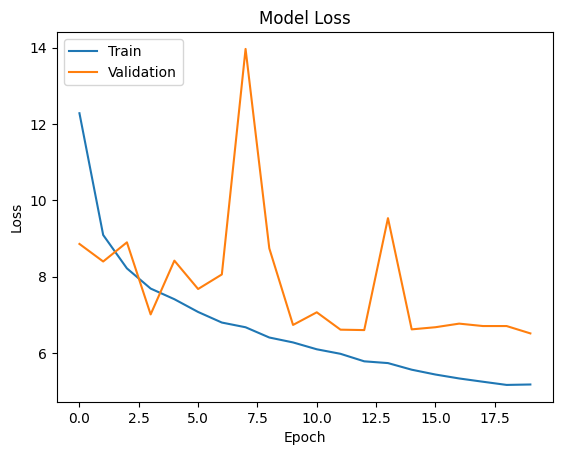

In [55]:
# Plotting the training and validation loss over epochs
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Original Age: 78.0
1/1 [==============================] - 0s 106ms/step
Predicted Age: 78.38408


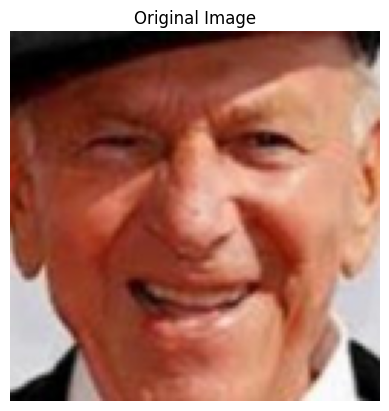

In [56]:
index = 30
print("Original Age:", y_age[index])

# Predict age using the model
pred_age = model.predict(x_train[index].reshape(1, 128, 128, 3))[0][0]
print("Predicted Age:", pred_age)

# Display the image
plt.imshow(x_train[index])
plt.title("Original Image")
plt.axis('off')
plt.show()

Original Age: 26.0
1/1 [==============================] - 0s 22ms/step
Predicted Age: 26.448446


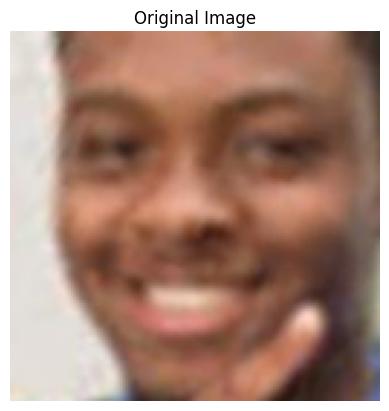

In [59]:
index = 4
print("Original Age:", y_age[index])

# Predict age using the model
pred_age = model.predict(x_train[index].reshape(1, 128, 128, 3))[0][0]
print("Predicted Age:", pred_age)

# Display the image
plt.imshow(x_train[index])
plt.title("Original Image")
plt.axis('off')
plt.show()